# About

Here we prepare, plot (and save) the results for CI plots, which were obtained in:
- `colab_extended_ci_rf_and_gp_saving_results.ipnb`

The notebook includes both one-run and multiple-runs CIs plots

In [1]:
%ls

all_plots.ipynb
colab_extended_GPflow_pipeline.ipynb
colab_extended_ci-rf-gp_xgb-sota-check_results.ipynb
colab_extended_grid_search_pipeline.ipynb
colab_reproducing_ci_gp.ipynb
colab_reproducing_ci_rf.ipynb
colab_reproducing_grid_search_pipeline.ipynb
eda.ipynb
prepare_and_plot_extended_ci_rf_and_gp_results.ipynb
prepare_extended_grid_search_results.ipynb
prepare_reproducing_grid_search_results.ipynb


In [2]:
%ls ../data/

ESOL_README
FreeSolv_README
Lipo_README
esol_original.csv
esol_original_1024ecfp4_features.csv
esol_original_1024ecfp6_features.csv
esol_original_2048ecfp4_features.csv
esol_original_2048ecfp6_features.csv
esol_original_IdSmilesLabels.csv
esol_original_extra_features.csv
esol_original_rdkit_features.csv
freesolv_original.csv
freesolv_original_1024ecfp4_features.csv
freesolv_original_1024ecfp6_features.csv
freesolv_original_2048ecfp4_features.csv
freesolv_original_2048ecfp6_features.csv
freesolv_original_IdSmilesLabels.csv
freesolv_original_rdkit_features.csv
lipophilicity_original.csv
lipophilicity_original_1024ecfp4_features.csv
lipophilicity_original_1024ecfp6_features.csv
lipophilicity_original_2048ecfp4_features.csv
lipophilicity_original_2048ecfp6_features.csv
lipophilicity_original_IdSmilesLabels.csv
lipophilicity_original_rdkit_features.csv


## Import modules

### Standard imports

In [3]:
import json
import pickle

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# metrics
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import jaccard_score # Tanimoto

### Custom imports

In [5]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import FIGSIZE_CI, FIGSIZE_HEATMAP, DPI, PLOTS_DIR
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import plot_algorithm_dataset_comparison_heatmap


from util_scripts.plotting_functions_and_vars import datasets_to_rounding_precision

sys.path.insert(0, './notebooks')

## Set plotting style

In [6]:
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.rcParams['axes.facecolor']='w'
#plt.rcParams['axes.linewidth']=1
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['figure.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'
#plt.rcParams['grid.color']='white'

# sns.set()

# Load Data

## CHOOSE: dataset, smile_type, grid_search_type

In [7]:
dataset = 'esol'
assert dataset in ['freesolv', 'esol', 'lipophilicity']

smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'extended'
assert grid_search_type in ['reproducing', 'extended']

# correlated features treatment
if dataset == 'esol':
    cf = 'reduced'
else:
    cf = 'full'
assert cf in ['reduced', 'full']

In [8]:
# # for esol
# cf = 'full'

## Titles, Units and Labels for datasets

In [9]:
for key, value in datasets_to_titles.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  Solvation Energy
esol          :  Log Solubility
lipophilicity :  Octanol/Water Distribution Coefficient


In [10]:
for key, value in datasets_to_units.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  (kcal/mol)
esol          :  (mol/litre)
lipophilicity :  (logD)


In [11]:
for key, value in metrics_to_labels.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

RMSE          :  root-mean-square error
MAE           :  mean absolute error
R^2           :  R^2 (coefficient of determination)
pearson_r     :  Pearson correlation


In [12]:
rp = datasets_to_rounding_precision[dataset]
rp

2

## CHOOSE metric to display

In [13]:
metric = 'RMSE'
assert metric in metrics_to_labels

In [14]:
if metric in ['RMSE', 'MAE']:
    pass
else:
    # no units
    datasets_to_units = {'freesolv': '', 'esol': '', 'lipophilicity': ''}

## Choose model to show

In [15]:
model = 'rf'
assert model in ['rf', 'gp']

In [16]:
models_to_title_additions = {
    'rf': 'Random Forests',
    'gp': 'Gaussian Processes'
}

## Load files:

In [17]:
print(dataset, smile_type, grid_search_type, cf, model)

esol original extended full rf


In [18]:
# save results as csv-s, rewrite each time
df_true = pd.read_csv(f'../results/{dataset}_{smile_type}_{grid_search_type}_{cf}_multiple_ci_runs_true_{model}.csv')
df_pred = pd.read_csv(f'../results/{dataset}_{smile_type}_{grid_search_type}_{cf}_multiple_ci_runs_pred_{model}.csv')
df_std = pd.read_csv(f'../results/{dataset}_{smile_type}_{grid_search_type}_{cf}_multiple_ci_runs_std_{model}.csv')

## Have a look at files

In [19]:
df_true.shape, df_pred.shape, df_std.shape

((226, 30), (226, 30), (226, 30))

In [20]:
df_true.head()

,test_true_0,test_true_1,test_true_2,test_true_3,test_true_4,test_true_5,test_true_6,test_true_7,test_true_8,test_true_9,...,test_true_20,test_true_21,test_true_22,test_true_23,test_true_24,test_true_25,test_true_26,test_true_27,test_true_28,test_true_29
0,-2.540,-0.010,-2.430,-5.05,-0.854,-0.620,-1.30,-1.140,-3.53,-3.770,...,-2.860,-3.893,-0.82,-4.883,-4.23,0.39,-0.73,-3.040,-2.60,-2.349
1,-2.253,-8.003,-6.510,0.47,-1.640,-2.060,-1.13,-5.370,-2.15,-4.560,...,-7.820,-4.220,-2.85,-4.432,-4.71,-5.16,0.96,-4.286,-5.37,-7.680
2,-2.484,-1.300,-4.194,-5.66,-6.290,-8.334,-3.39,-2.310,-3.59,-0.720,...,-2.843,-3.150,-1.29,-7.800,-2.96,-0.60,-4.06,-3.750,-2.22,-2.350
3,-2.540,-3.590,-4.000,-4.46,-2.350,-3.500,-0.41,-0.950,-1.78,-1.614,...,-1.220,-1.820,-4.15,-1.440,-2.46,-0.60,-1.08,-0.700,-2.64,-1.920
4,-7.200,-1.920,-2.452,-2.12,-1.890,0.523,-7.92,-2.468,-1.94,-4.140,...,-2.360,-6.090,-3.59,-4.140,-1.08,-3.85,-1.68,0.009,-3.40,1.120


In [21]:
df_pred.head()

,test_pred_0,test_pred_1,test_pred_2,test_pred_3,test_pred_4,test_pred_5,test_pred_6,test_pred_7,test_pred_8,test_pred_9,...,test_pred_20,test_pred_21,test_pred_22,test_pred_23,test_pred_24,test_pred_25,test_pred_26,test_pred_27,test_pred_28,test_pred_29
0,-2.468450,0.154667,-2.234392,-4.691708,-0.682395,-0.721610,-1.079215,-0.873667,-3.380622,-3.973230,...,-3.172639,-4.466803,-1.302623,-3.753847,-4.264882,-0.262270,-0.727567,-2.938102,-3.029462,-2.196876
1,-2.290429,-6.933175,-6.710913,-0.018350,-1.508900,-2.214430,-2.986040,-4.944415,-1.948415,-3.873120,...,-7.887385,-3.610353,-2.797095,-4.967153,-4.656777,-3.734931,0.372997,-4.421237,-4.957531,-7.670190
2,-2.517211,-1.294947,-4.536663,-4.227113,-5.728635,-8.218903,-2.731077,-2.370032,-3.736257,-0.353915,...,-2.552258,-3.876300,-1.436080,-7.325567,-2.415720,-0.601352,-3.662248,-3.678365,-1.148031,-1.768806
3,-2.468450,-4.055083,-3.785085,-5.203003,-1.729603,-3.800112,-1.426755,-1.907510,-1.749762,-2.067388,...,-1.588828,-1.553912,-4.474565,-1.472998,-2.292508,-0.461950,-1.108813,-1.007667,-2.601217,-0.754125
4,-6.986867,-2.575022,-2.591727,-1.726506,-1.862897,-3.348035,-8.309978,-2.559625,-1.890983,-4.597212,...,-2.284041,-5.261628,-4.000077,-4.016500,-1.100517,-3.776830,-1.819253,-1.089602,-3.286858,0.086257


In [22]:
df_std.head()

,test_std_0,test_std_1,test_std_2,test_std_3,test_std_4,test_std_5,test_std_6,test_std_7,test_std_8,test_std_9,...,test_std_20,test_std_21,test_std_22,test_std_23,test_std_24,test_std_25,test_std_26,test_std_27,test_std_28,test_std_29
0,0.537685,1.408282,1.153721,0.812973,0.989220,1.119482,1.057081,0.961101,0.602005,0.462151,...,0.488473,0.793675,0.886288,0.597001,0.654970,1.172218,1.072474,1.017504,0.609850,1.046191
1,0.588572,1.650968,1.583553,1.304867,0.797387,0.906133,0.910046,0.981951,0.705167,0.499177,...,2.133924,0.508207,0.399994,0.924387,0.779422,0.726316,1.538427,1.072677,0.863685,2.228561
2,0.551081,0.949237,1.161538,0.735957,1.362904,2.457269,0.933848,0.692739,0.611262,1.184220,...,0.503190,0.564669,0.820786,1.964819,0.612061,1.118824,0.824730,1.039048,0.796897,1.056587
3,0.537685,0.818151,1.110598,0.955605,0.728763,0.935868,1.352555,0.740319,0.732936,0.476832,...,0.802788,0.766000,0.540990,0.673160,0.649176,1.214253,1.013520,1.226729,0.620429,1.186327
4,1.755563,0.791988,1.123754,0.695313,0.703252,0.880911,2.247300,0.669490,0.728476,0.646979,...,0.499705,1.092659,0.368618,0.620223,0.958021,0.815599,0.853702,1.191584,0.610093,1.403486


# One run

In [23]:
y_test = df_true.iloc[:, 0]
y_test_pred = df_pred.iloc[:, 0]
y_test_std = df_std.iloc[:, 0]

## RMSE

In [24]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)

0.7131056245433154

## Calculate confidence bounds using std part of gpr predictions

In [25]:
upper = y_test_pred + 1.96 * y_test_std
lower = y_test_pred - 1.96 * y_test_std

In [26]:
CIs_df = pd.DataFrame(
    {'y_test': y_test,
     'y_test_pred': y_test_pred,
     'y_test_std': y_test_std,
     'lower': lower,
     'upper': upper,
     'sq_error': (y_test - y_test_pred) ** 2
     }
)
CIs_df = CIs_df.sort_values(by='y_test_std', ascending=True)
CIs_df['cumul_sq_error'] = CIs_df['sq_error'].cumsum()
CIs_df['cumul_mse'] = CIs_df['cumul_sq_error'].values / np.arange(1, CIs_df.shape[0]+1)
CIs_df['cumul_rmse'] = np.sqrt(CIs_df['cumul_mse'])
display(CIs_df)

,y_test,y_test_pred,y_test_std,lower,upper,sq_error,cumul_sq_error,cumul_mse,cumul_rmse
99,-0.410,-1.304002,0.356981,-2.003684,-0.604319,0.799239,0.799239,0.799239,0.894002
120,-2.850,-2.897603,0.488225,-3.854524,-1.940683,0.002266,0.801505,0.400753,0.633050
113,-1.940,-3.100696,0.497667,-4.076122,-2.125269,1.347214,2.148719,0.716240,0.846309
74,-2.878,-2.620083,0.500036,-3.600155,-1.640012,0.066521,2.215240,0.553810,0.744184
131,-2.356,-2.473441,0.501295,-3.455979,-1.490903,0.013792,2.229033,0.445807,0.667687
...,...,...,...,...,...,...,...,...,...
219,-8.230,-8.020025,2.289597,-12.507635,-3.532415,0.044090,113.782040,0.512532,0.715913
188,-7.870,-8.370993,2.392667,-13.060621,-3.681366,0.250994,114.033035,0.511359,0.715094
8,-7.660,-8.283503,2.420512,-13.027706,-3.539301,0.388756,114.421791,0.510812,0.714711
156,-8.804,-8.417430,2.478480,-13.275250,-3.559610,0.149436,114.571227,0.509205,0.713586


In [27]:
# checking that calculating rmse each time separately would be the same
CIs_df = CIs_df.sort_values(by='y_test_std', ascending=True)


calculation_match = []
for i in range(CIs_df.shape[0]):
    a = CIs_df.y_test[:i+1]
    b = CIs_df.y_test_pred[:i+1]
    
    calculation_match.append(np.abs(mean_squared_error(a, b, squared=False) - CIs_df.cumul_rmse.iloc[i]) < 1e-8)
    
# if returns true - it is the same
assert np.all(calculation_match) 

## Plot test observations with sdt values as colours

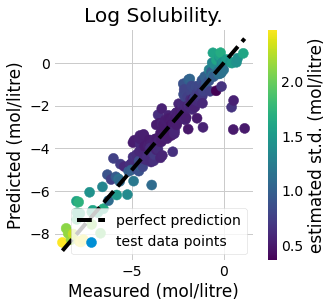

In [28]:
# sort values used for x axis
CIs_df = CIs_df.sort_values(by='y_test')

# Plot error bars for predicted quantity using unbiased variance
plt.figure(figsize=FIGSIZE_CI)

plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', label='perfect prediction')
plt.scatter(x=CIs_df.y_test, y=CIs_df.y_test_pred, c=CIs_df.y_test_std, s=100, label='test data points')

plt.xlabel(f'Measured {datasets_to_units[dataset]}')
plt.ylabel(f'Predicted {datasets_to_units[dataset]}')
plt.title(f'{datasets_to_titles[dataset]}.')

# add colourbar and legend
plt.colorbar(label=f'estimated st.d. {datasets_to_units[dataset]}')
plt.legend()

plt.savefig(f'{PLOTS_DIR}/ci_plots/predicted_vs_measured_scatter_colour_conf_{dataset}_{cf}_{model}.png', dpi=DPI, bbox_inches='tight')
plt.show()

## Plot sq^error vs std

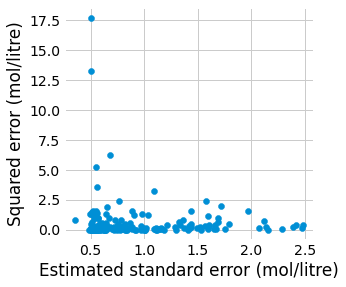

In [29]:
# sort values used for x axis
CIs_df = CIs_df.sort_values(by='y_test_std')

# Plot error bars for predicted quantity using unbiased variance
plt.figure(figsize=FIGSIZE_CI)

#plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', label='perfect prediction')
plt.scatter(x=CIs_df.y_test_std, y=CIs_df.sq_error)


plt.xlabel(f'Estimated standard error {datasets_to_units[dataset]}')
plt.ylabel(f'Squared error {datasets_to_units[dataset]}')
# plt.title(f'{datasets_to_titles[dataset]}')

# # add colourbar and legend
# plt.colorbar()
# plt.legend()

#plt.savefig(f'{PLOTS_DIR}/pubs_units_values.png', bbox_inches='tight')
plt.show()

## Plot 95% confidence intervals

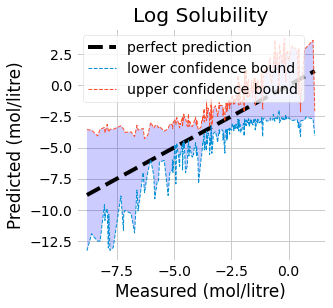

In [30]:
# sort values used for x axis
CIs_df = CIs_df.sort_values(by='y_test')

fig, ax = plt.subplots(1, figsize=FIGSIZE_CI)

# ax.set_aspect('equal')

ax.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', label='perfect prediction')

ax.plot(CIs_df.y_test, CIs_df.lower, linewidth=1, linestyle='--', label='lower confidence bound')
ax.plot(CIs_df.y_test, CIs_df.upper, linewidth=1, linestyle='--', label='upper confidence bound')
ax.fill_between(CIs_df.y_test, CIs_df.upper, CIs_df.lower, facecolor='blue', alpha=0.2)




ax.set_title(f'{datasets_to_titles[dataset]}')
ax.set_xlabel(f'Measured {datasets_to_units[dataset]}')
ax.set_ylabel(f'Predicted {datasets_to_units[dataset]}')

ax.legend(loc='upper left')

#plt.savefig(f'{PLOTS_DIR}/ci_plots/predicted_vs_measured_with_ci_bounds_{dataset}_{cf}_{model}.png', dpi=DPI, bbox_inches='tight')
plt.show()

## Calculate the proportion of measured values in test set within 95% CIs

In [31]:
within_cis = (CIs_df.lower <= CIs_df.y_test) & (CIs_df.y_test <= CIs_df.upper)
within_cis.sum() / len(within_cis)

0.9380530973451328

## Confidence plots (RMSE vs Prcentile)

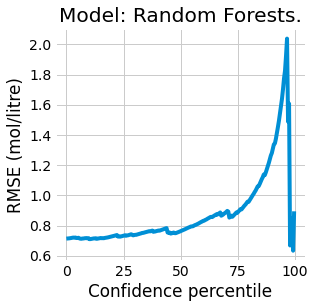

In [32]:
# sort values used for x axis
CIs_df = CIs_df.sort_values(by='y_test_std', ascending=True)

# set size
plt.figure(figsize=FIGSIZE_CI)

confidence_percentiles = np.arange(1e-14, 100, 100/len(y_test))
flipped_cumul_rmse = CIs_df['cumul_rmse'].values[::-1]


plt.plot(confidence_percentiles, flipped_cumul_rmse)
plt.title(f'Model: {models_to_title_additions[model]}.')
plt.xlabel('Confidence percentile')
plt.ylabel(f'RMSE {datasets_to_units[dataset]}')


plt.savefig(f'{PLOTS_DIR}/ci_plots/cumulrmse_vs_confidence_one_run_{dataset}_{cf}_{model}.png', dpi=DPI, bbox_inches='tight')
plt.show()

In [33]:
corr, p_value = pearsonr(confidence_percentiles, flipped_cumul_rmse)
corr, p_value

(0.7133085162217205, 1.955505395598028e-36)

# Multiple runs

In [34]:
dataset_to_num_cis = {
    'freesolv': 50,
    'esol': 30,
    'lipophilicity': 10
}

In [35]:
dataset_to_num_cis[dataset]

30

In [36]:
rmse_mult_runs = []
within_95_cis_mult_runs = []
cumulrmse_vs_percentile_corr_mult_runs = []

flipped_cumulrmse_mult_runs = []

for i in range(dataset_to_num_cis[dataset]):
    
    # get data
    y_test = df_true.iloc[:, i]
    y_test_pred = df_pred.iloc[:, i]
    y_test_std = df_std.iloc[:, i]
    
    # calculate and record rmse
    rmse_mult_runs.append(mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False))
    
    # calculate upper and lower 95% conf bounds
    upper = y_test_pred + 1.96 * y_test_std
    lower = y_test_pred - 1.96 * y_test_std
    
    # calculate and record proportion of true values within 95% CI from prediction
    within_cis = (lower <= y_test) & (y_test <= upper)
    within_cis_proportion = within_cis.sum() / len(within_cis)
    within_95_cis_mult_runs.append(within_cis_proportion)
    
    # create a dataframe to be able to sort things easily
    CIs_df = pd.DataFrame(
        {'y_test': y_test,
         'y_test_pred': y_test_pred,
         'y_test_std': y_test_std,
         'lower': lower,
         'upper': upper,
         'sq_error': (y_test - y_test_pred) ** 2
        }
    )
    
    # create cumulative rmse column
    CIs_df = CIs_df.sort_values(by='y_test_std', ascending=True)
    CIs_df['cumul_sq_error'] = CIs_df['sq_error'].cumsum()
    CIs_df['cumul_mse'] = CIs_df['cumul_sq_error'].values / np.arange(1, CIs_df.shape[0]+1)
    CIs_df['cumul_rmse'] = np.sqrt(CIs_df['cumul_mse'])
    
    # record confidence percentiles and flip cumulative rmses
    confidence_percentiles = np.arange(1e-14, 100, 100/len(y_test))
    flipped_cumul_rmse = CIs_df['cumul_rmse'].values[::-1]
    
    # record flipped cumulative rmse
    flipped_cumulrmse_mult_runs.append(flipped_cumul_rmse)
    
    # record correlation between cumulative rmse and confidence percentile
    cumulrmse_vs_percentile_corr_mult_runs.append(pearsonr(confidence_percentiles, flipped_cumul_rmse)[0])

print('Done')

Done


# Important metrics (corr, rmse, within_95)

In [37]:
dataset, cf, model

('esol', 'full', 'rf')

## Correlation

In [38]:
#cumulrmse_vs_percentile_corr_mult_runs

In [39]:
np.mean(cumulrmse_vs_percentile_corr_mult_runs).round(3), np.std(cumulrmse_vs_percentile_corr_mult_runs).round(3)

(-0.04, 0.475)

## RMSE

In [40]:
#rmse_mult_runs

In [41]:
np.mean(rmse_mult_runs).round(3), np.std(rmse_mult_runs).round(3)

(0.638, 0.041)

## Within 95% CIs

In [42]:
#within_95_cis_mult_runs

In [43]:
np.mean(within_95_cis_mult_runs).round(3), np.std(within_95_cis_mult_runs).round(3)

(0.968, 0.02)

# Separate plots (do not save)

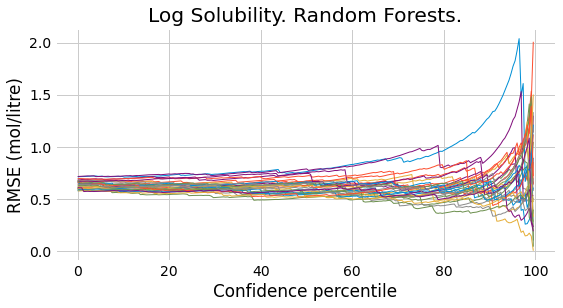

In [44]:
# set size
plt.figure(figsize=FIGSIZE_HEATMAP)

for flipped_cumul_rmse in flipped_cumulrmse_mult_runs:
    plt.plot(confidence_percentiles, flipped_cumul_rmse, linewidth=1)

plt.title(f'{datasets_to_titles[dataset]}. {models_to_title_additions[model]}.')
plt.xlabel('Confidence percentile')
plt.ylabel(f'RMSE {datasets_to_units[dataset]}')


#plt.savefig(f'{PLOTS_DIR}/ci_plots/cumulrmse_vs_confidence_mult_run_{dataset}_{cf}_{model}.png', dpi=DPI, bbox_inches='tight')
plt.show()

# Calculations for Confidence Plot

In [45]:
#print(np.array(flipped_cumulrmse_mult_runs).shape)
#print(np.array(flipped_cumulrmse_mult_runs).std(axis=0).shape)
#print(np.array(flipped_cumulrmse_mult_runs).mean(axis=0).shape)

flipped_cumulrmse_mean = np.array(flipped_cumulrmse_mult_runs).mean(axis=0)
flipped_cumulrmse_sdt = np.array(flipped_cumulrmse_mult_runs).mean(axis=0)

flipped_cumulrmse_lower = flipped_cumulrmse_mean - 1.96*flipped_cumulrmse_sdt
flipped_cumulrmse_upper = flipped_cumulrmse_mean + 1.96*flipped_cumulrmse_sdt

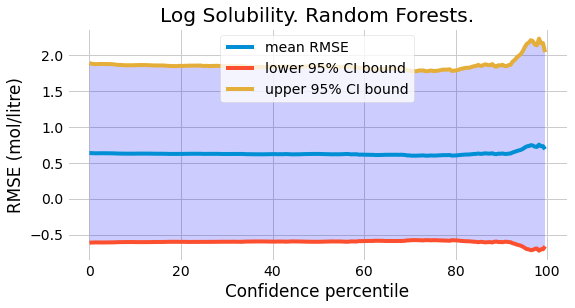

In [46]:
# set size
plt.figure(figsize=FIGSIZE_HEATMAP)

plt.plot(confidence_percentiles, flipped_cumulrmse_mean, label=f'mean {metric}')
plt.plot(confidence_percentiles, flipped_cumulrmse_lower, label=f'lower 95% CI bound')
plt.plot(confidence_percentiles, flipped_cumulrmse_upper, label=f'upper 95% CI bound')
plt.fill_between(confidence_percentiles, flipped_cumulrmse_upper, flipped_cumulrmse_lower, facecolor='blue', alpha=0.2)

plt.legend(loc='upper center')

plt.title(f'{datasets_to_titles[dataset]}. {models_to_title_additions[model]}.')
plt.xlabel('Confidence percentile')
plt.ylabel(f'RMSE {datasets_to_units[dataset]}')

#plt.savefig(f'{PLOTS_DIR}/ci_plots/cumulrmse_vs_confidence_with_ci_bounds_{dataset}_{cf}_{model}.png', dpi=DPI, bbox_inches='tight')
plt.show()

### Together

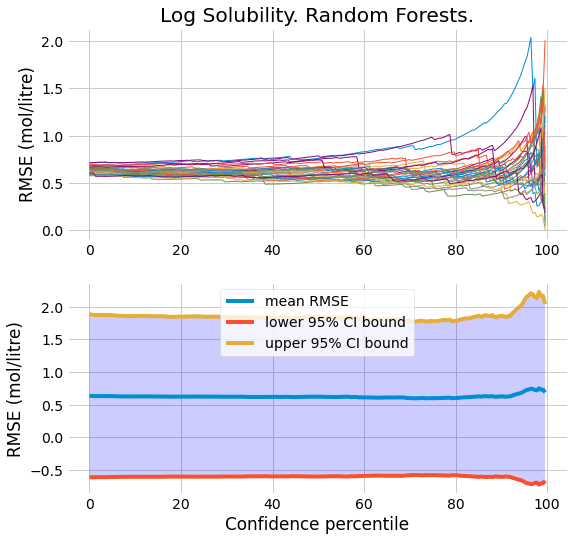

In [47]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8)) #, sharey=True

for flipped_cumul_rmse in flipped_cumulrmse_mult_runs:
    ax1.plot(confidence_percentiles, flipped_cumul_rmse, linewidth=1)

ax1.set_title(f'{datasets_to_titles[dataset]}. {models_to_title_additions[model]}.')
#ax1.set_xlabel('Confidence percentile')
ax1.set_ylabel(f'RMSE {datasets_to_units[dataset]}')


ax2.plot(confidence_percentiles, flipped_cumulrmse_mean, label=f'mean {metric}')
ax2.plot(confidence_percentiles, flipped_cumulrmse_lower, label=f'lower 95% CI bound')
ax2.plot(confidence_percentiles, flipped_cumulrmse_upper, label=f'upper 95% CI bound')
ax2.fill_between(confidence_percentiles, flipped_cumulrmse_upper, flipped_cumulrmse_lower, facecolor='blue', alpha=0.2)

ax2.legend(loc='upper center')

#ax2.set_title(datasets_to_titles[dataset])
ax2.set_xlabel('Confidence percentile')
ax2.set_ylabel(f'RMSE {datasets_to_units[dataset]}')

plt.savefig(f'{PLOTS_DIR}/ci_plots/cumulrmse_vs_confidence_multiple_runs_both_{dataset}_{cf}_{model}.png', dpi=DPI, bbox_inches='tight')
plt.show()